In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import utils
import os

fpaths = [] #file paths
for f in os.listdir('audio'):
    for w in os.listdir('audio/' + f):
        print(w)#file names
    

lime10.wav
lime11.wav
lime01.wav
lime08.wav
lime03.wav
lime06.wav
lime07.wav
lime14.wav
lime09.wav
lime05.wav
lime15.wav
lime02.wav
lime13.wav
lime12.wav
lime04.wav
pineapple07.wav
pineapple10.wav
pineapple13.wav
pineapple11.wav
pineapple09.wav
pineapple08.wav
pineapple05.wav
pineapple01.wav
pineapple03.wav
pineapple04.wav
pineapple15.wav
pineapple14.wav
pineapple06.wav
pineapple12.wav
pineapple02.wav
orange04.wav
orange13.wav
orange15.wav
orange10.wav
orange07.wav
orange14.wav
orange03.wav
orange06.wav
orange09.wav
orange11.wav
orange12.wav
orange05.wav
orange02.wav
orange01.wav
orange08.wav
peach04.wav
peach05.wav
peach01.wav
peach10.wav
peach07.wav
peach06.wav
peach08.wav
peach14.wav
peach03.wav
peach02.wav
peach09.wav
peach11.wav
peach13.wav
peach15.wav
peach12.wav
banana02.wav
banana01.wav
banana08.wav
banana15.wav
banana14.wav
banana13.wav
banana04.wav
banana03.wav
banana09.wav
banana11.wav
banana07.wav
banana06.wav
banana05.wav
banana12.wav
banana10.wav
kiwi12.wav
kiwi06.wav
kiw

In [3]:
fpaths = []
labels= []
spoken = []
for f in os.listdir('audio'):
    for w in os.listdir('audio/'+f):
        fpaths.append('audio/'+f+'/'+w)
        labels.append(f) #all labels
        if f not in spoken:
            spoken.append(f)
print('Words: ',spoken);
        

('Words: ', ['lime', 'pineapple', 'orange', 'peach', 'banana', 'kiwi', 'apple'])


7 different words are spoken, each 15 times. Everything is done by only one user.

In [4]:
#Files can be heard in Linux using the following commands from the command line
#cat kiwi07.wav | aplay -f S16_LE -t wav -r 8000
#Files are signed 16 bit raw = y axis sampling, sample rate 8000

numCols = 4*8000  #each is 4 s long, so there is 32000 recordings - let say, at most
from scipy.io import wavfile

data = np.zeros((len(fpaths),numCols))
maxsize = -1
for n,file in enumerate(fpaths):#paths are relative to this notebook
    _, d = wavfile.read(file)  #Return the sample rate (in samples/sec) and data from a WAV file
    #print(d.shape)
    data[n, :d.shape[0]] = d
    if d.shape[0] > maxsize:
        maxsize = d.shape[0]
data = data[:, :maxsize] #resize matrix


#LEt extract the files into the matrix
#each file will have the labes=0-7


In [5]:
#let addres labels - class that we want to acchive
print('Number of files:', data.shape[0])
all_labels = np.zeros(data.shape[0])

for n, l in enumerate(set(labels)): #labels are set
    all_labels[np.array([i for i, _ in enumerate(labels) if _ == l])] = n
    
print('Labels and label indices', all_labels)

('Number of files:', 105)
('Labels and label indices', array([ 6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]))


Now, the features/attributes should be extracted.

The features that describe time and frequency should be extracted.

In this example, simple frequency peak detection was used, rather than the bevy of expert features typically used in a modern speech recognition pipeline (MFCCs, or more recently, a pretrained multilayer neural network). This has a direct effect on performance, but allows for a holistic implementation that fits in a single post :)


In [6]:
import scipy

#x-is the input signal
#fftsize- number of the instances over which tto get mean amplitude (one spectrogram value)
#overlap_pct- is precentage of the spectrogram range that will overlap
#             [10:74] is one spectrogram value range, [42:106] 
#              is another spectogram range. Dure to the overlap_pct = .5
def stft(x, fftsize=64, overlap_pct=.5): #short fuier transform.  
    #Modified from http://stackoverflow.com/questions/2459295/stft-and-istft-in-python
    hop = int(fftsize * (1 - overlap_pct)) #the number of the instances to be hopped from the beginning of the last
           #spectogram range.
    w = scipy.hanning(fftsize + 1)[:-1]    
    raw = np.array([np.fft.rfft(w * x[i:i + fftsize]) for i in range(0, len(x) - fftsize, hop)])
    return raw[:, :(fftsize // 2)]

(216, 32)


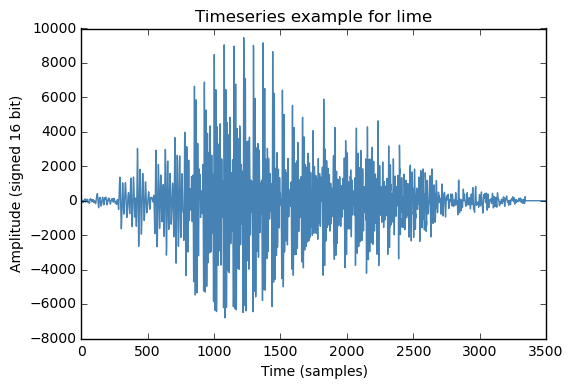

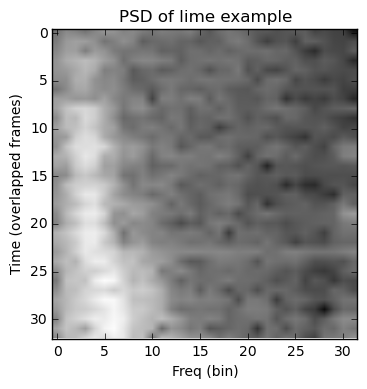

In [7]:
import matplotlib.pyplot as plt
plt.plot(data[0, :], color='steelblue')
plt.title('Timeseries example for %s'%labels[0])
plt.xlim(0, 3500)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude (signed 16 bit)')
plt.figure()

# + 1 to avoid log of 0
log_freq = 20 * np.log(np.abs(stft(data[0, :])) + 1)
print(log_freq.shape)
plt.imshow(log_freq, cmap='gray', interpolation=None)
plt.xlabel('Freq (bin)')
plt.ylabel('Time (overlapped frames)')
plt.ylim(log_freq.shape[1])
plt.title('PSD of %s example'%labels[0])

In [8]:
from numpy.lib.stride_tricks import as_strided

#Peak detection using the technique described here: http://kkjkok.blogspot.com/2013/12/dsp-snippets_9.html 
def peakfind(x, n_peaks, l_size=3, r_size=3, c_size=3, f=np.mean):
    win_size = l_size + r_size + c_size
    shape = x.shape[:-1] + (x.shape[-1] - win_size + 1, win_size)
    strides = x.strides + (x.strides[-1],)
    xs = as_strided(x, shape=shape, strides=strides)
    def is_peak(x):
        centered = (np.argmax(x) == l_size + int(c_size/2))
        l = x[:l_size]
        c = x[l_size:l_size + c_size]
        r = x[-r_size:]
        passes = np.max(c) > np.max([f(l), f(r)])
        if centered and passes:
            return np.max(c)
        else:
            return -1
    r = np.apply_along_axis(is_peak, 1, xs)
    top = np.argsort(r, None)[::-1]
    heights = r[top[:n_peaks]]
    #Add l_size and half - 1 of center size to get to actual peak location
    top[top > -1] = top[top > -1] + l_size + int(c_size / 2.)
    return heights, top[:n_peaks]

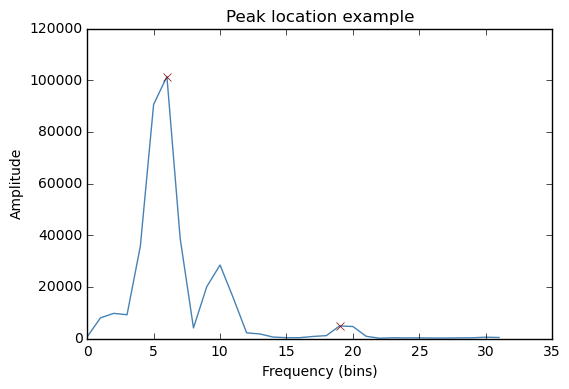

In [9]:
plot_data = np.abs(stft(data[20, :]))[15, :]
values, locs = peakfind(plot_data, n_peaks=6)
fp = locs[values > -1]
fv = values[values > -1]
plt.plot(plot_data, color='steelblue')
plt.plot(fp, fv, 'x', color='darkred')
plt.title('Peak location example')
plt.xlabel('Frequency (bins)')
plt.ylabel('Amplitude')

In [10]:
#This processing (top freq peaks) only works for single speaker case... need better features for multispeaker!
#MFCC (or deep NN/automatic feature extraction) could be interesting
all_obs = []
for i in range(data.shape[0]):
    d = np.abs(stft(data[i, :]))
    n_dim = 6
    obs = np.zeros((n_dim, d.shape[0]))
    for r in range(d.shape[0]):
        _, t = peakfind(d[r, :], n_peaks=n_dim)
        obs[:, r] = t.copy()
    if i % 10 == 0:
        print("Processed obs %s" % i)
    all_obs.append(obs)
    
all_obs = np.atleast_3d(all_obs)

Processed obs 0
Processed obs 10
Processed obs 20
Processed obs 30
Processed obs 40
Processed obs 50
Processed obs 60
Processed obs 70
Processed obs 80
Processed obs 90
Processed obs 100


In [11]:
all_obs

array([[[  5.,  19.,  22., ...,  27.,  27.,  27.],
        [ 14.,  26.,  27., ...,  26.,  26.,  26.],
        [ 26.,  27.,  14., ...,   5.,   5.,   5.],
        [ 27.,  14.,   5., ...,   6.,   6.,   6.],
        [  6.,   5.,   6., ...,   7.,   7.,   7.],
        [  7.,   6.,   7., ...,   8.,   8.,   8.]],

       [[ 16.,  15.,  16., ...,  27.,  27.,  27.],
        [ 27.,  20.,  24., ...,  26.,  26.,  26.],
        [ 14.,  14.,  27., ...,   5.,   5.,   5.],
        [  5.,   5.,  14., ...,   6.,   6.,   6.],
        [  6.,   6.,   5., ...,   7.,   7.,   7.],
        [  7.,   7.,   6., ...,   8.,   8.,   8.]],

       [[ 14.,  19.,  15., ...,  27.,  27.,  27.],
        [ 25.,  27.,  20., ...,  26.,  26.,  26.],
        [ 27.,  14.,  14., ...,   5.,   5.,   5.],
        [  5.,   5.,   5., ...,   6.,   6.,   6.],
        [  6.,   6.,   6., ...,   7.,   7.,   7.],
        [  7.,   7.,   7., ...,   8.,   8.,   8.]],

       ..., 
       [[  8.,   7.,   4., ...,  27.,  27.,  27.],
        [ 16

In [14]:
len(all_obs[0])

6